In [3]:
import sqlite3 as sql
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
#connection
conn = sql.connect('database.sqlite')
conn

In [7]:
pd.read_sql_query("select * from Salaries", conn)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0,400184.25,,567595.43,567595.43,2011,,San Francisco,
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,,538909.28,538909.28,2011,,San Francisco,
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,,335279.91,335279.91,2011,,San Francisco,
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916,56120.71,198306.9,,332343.61,332343.61,2011,,San Francisco,
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737,182234.59,,326373.19,326373.19,2011,,San Francisco,
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148649,148650,Roy I Tillery,Custodian,0,0,0,0,0.00,0.00,2014,,San Francisco,PT
148650,148651,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,,San Francisco,
148651,148652,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,,San Francisco,
148652,148653,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,,San Francisco,


In [8]:
def sql_query(q):
    return pd.read_sql_query(q,conn)

1. What is the average TotalPayBenefits for each JobTitle? exclude ('Not Provided', 'Not provided')

In [10]:
q = ''' select avg(TotalPayBenefits), jobtitle from Salaries
        WHERE jobtitle NOT IN ('Not Provided', 'Not provided')
        Group by jobtitle   '''
sql_query(q)

,avg(TotalPayBenefits),JobTitle
0,44035.664337,ACCOUNT CLERK
1,47429.268000,ACCOUNTANT
2,29031.742917,ACCOUNTANT INTERN
3,80266.370000,"ACPO,JuvP, Juv Prob (SFERS)"
4,67594.400000,ACUPUNCTURIST
...,...,...
2153,52705.880385,X-RAY LABORATORY AIDE
2154,69521.123200,X-Ray Laboratory Aide
2155,53632.870000,"YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS"
2156,60118.550000,Youth Comm Advisor


2. Which JobTitle has the most employees in each year? exclude ('Not Provided', 'Not provided')

In [27]:
q = ''' select count(EmployeeName) as Employeecount, JobTitle, year from Salaries
        WHERE jobtitle NOT IN ('Not Provided', 'Not provided')
        Group by jobtitle, Year
        ORDER BY year, Employeecount desc'''
sql_query(q)

,Employeecount,JobTitle,Year
0,2388,TRANSIT OPERATOR,2011
1,1402,SPECIAL NURSE,2011
2,1219,REGISTERED NURSE,2011
3,796,CUSTODIAN,2011
4,794,FIREFIGHTER,2011
...,...,...,...
4131,1,Water Meter Shop Supervisor 1,2014
4132,1,Wharfinger 1,2014
4133,1,Window Cleaner Supervisor,2014
4134,1,Wire Rope Cable Maint Sprv,2014


3. What is the total number of unique employees? exclude ('Not Provided', 'Not provided')

In [29]:
q = ''' select count(Distinct EmployeeName) as uniqueEmployee from Salaries
        WHERE EmployeeName NOT IN ('Not Provided', 'Not provided')
        '''
sql_query(q)

,uniqueEmployee
0,110809


In [30]:
q = ''' select Distinct EmployeeName as uniqueEmployee from Salaries    
        WHERE EmployeeName NOT IN ('Not Provided', 'Not provided')
        '''
sql_query(q)  #unique employees name

,uniqueEmployee
0,NATHANIEL FORD
1,GARY JIMENEZ
2,ALBERT PARDINI
3,CHRISTOPHER CHONG
4,PATRICK GARDNER
...,...
110804,Afakasi O Afakasi
110805,Kenneth Mackey
110806,Mark W Mcclure
110807,Charlene D Mccully


4. Show All Employees Ordered By Their TotalPayBenefits In Descending Order? exclude ('Not Provided', 'Not provided')

In [31]:
q = ''' select EmployeeName , totalpaybenefits from Salaries
        WHERE EmployeeName NOT IN ('Not Provided', 'Not provided')
        ORDER BY totalpaybenefits desc'''
sql_query(q)

,EmployeeName,TotalPayBenefits
0,NATHANIEL FORD,567595.43
1,GARY JIMENEZ,538909.28
2,David Shinn,510732.68
3,Amy P Hart,479652.21
4,William J Coaker Jr.,436224.36
...,...,...
148643,Roy I Tillery,0.00
148644,Timothy E Gibson,-2.73
148645,Mark E Laherty,-8.20
148646,David P Kucia,-33.89


5. Show All Employees With A TotalPaybenefits Value Between 125,000 and 150,000 And A Job Title 'Firefighter'? exclude ('Not Provided', 'Not provided')

In [38]:
q = ''' select EmployeeName , totalpaybenefits, jobtitle from Salaries
        WHERE EmployeeName NOT IN ('Not Provided', 'Not provided') and (TotalPaybenefits between 125000 and 150000 ) and (jobtitle = "Firefighter")
'''
sql_query(q)

,EmployeeName,TotalPayBenefits,JobTitle
0,Randall Henderson,147912.75,Firefighter
1,Virginia Cheung,147862.14,Firefighter
2,Travis Hemenez,147664.12,Firefighter
3,Gail Readdie,147452.17,Firefighter
4,Gregory Ginotti,147216.47,Firefighter
...,...,...,...
110,Stephen J Kloster,126784.13,Firefighter
111,Jeffrey D Ryan,126687.13,Firefighter
112,Jovan R Blake,126169.62,Firefighter
113,Dino M Cafferata,125680.52,Firefighter


6. How many employees have no overtime pay or other pay? exclude ('Not Provided', 'Not provided')


In [40]:
q = ''' select count(EmployeeName), overtimepay, OtherPay from Salaries
        WHERE EmployeeName NOT IN ('Not Provided', 'Not provided')   AND (overtimepay = 0 OR otherpay = 0);
'''
sql_query(q)

,count(EmployeeName),OvertimePay,OtherPay
0,84266,0,400184.25


7. Show top 10 employees having (overtimepay+OtherPay) in bar plot?  exclude ('Not Provided', 'Not provided')

In [53]:
q = ''' select EmployeeName, overtimepay, OtherPay, (overtimepay + otherpay) AS TotalPay from Salaries
        WHERE EmployeeName NOT IN ('Not Provided', 'Not provided') AND (overtimepay != 0 and otherpay != 0)
        order by TotalPay desc limit 10;
'''
sql_query(q)

,EmployeeName,OvertimePay,OtherPay,TotalPay
0,GARY JIMENEZ,245131.88,137811.38,382943.26
1,CHRISTOPHER CHONG,56120.71,198306.90,254427.61
2,Gary Altenberg,220909.48,13126.31,234035.79
3,Khoa Trinh,146415.32,78057.41,224472.73
4,ALSON LEE,89062.90,134426.14,223489.04
5,Brendan A Ward,53142.28,163495.64,216637.92
6,Whitney P Yee,196689.18,16622.66,213311.84
7,Frederick Binkley,192424.49,17917.18,210341.67
8,James A Calonico,18205.01,189755.52,207960.53
9,John Ehrlich,1386.38,203735.92,205122.30


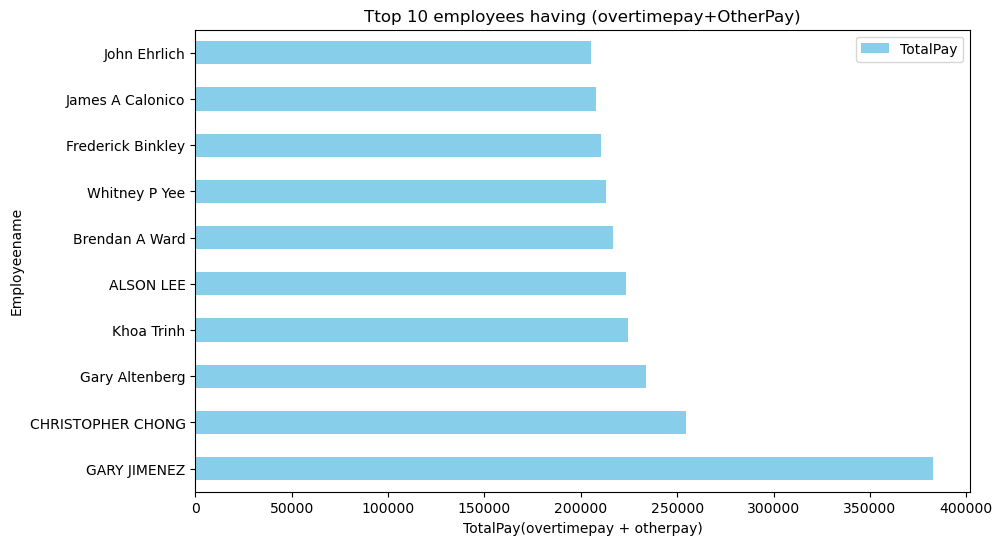

In [58]:
q = ''' select EmployeeName, overtimepay, OtherPay, (overtimepay + otherpay) AS TotalPay from Salaries
        WHERE EmployeeName NOT IN ('Not Provided', 'Not provided') AND (overtimepay != 0 and otherpay != 0)
        order by TotalPay desc limit 10;
'''
a = pd.read_sql_query(q, conn)
a.plot(kind='barh', x='EmployeeName', y='TotalPay', color='skyblue', figsize=(10, 6))
plt.xlabel('TotalPay(overtimepay + otherpay)')
plt.ylabel('Employeename')
plt.title('Ttop 10 employees having (overtimepay+OtherPay)')

plt.show()

8. Show The Average of BasePay, OverTime, OtherPay for all employees in pie chart? exclude ('Not Provided', 'Not provided')


In [77]:
q = ''' select avg(BasePay), avg(OverTimepay), avg( OtherPay) from Salaries
        WHERE BasePay IS NOT NULL 
       and OverTimepay IS NOT NULL 
       and OtherPay IS NOT NULL
       and BasePay NOT IN ('Not Provided', 'Not provided')
       and OverTimepay NOT IN ('Not Provided', 'Not provided')
       and OtherPay NOT IN ('Not Provided', 'Not provided')'''
sql_query(q)

,avg(BasePay),avg(OverTimepay),avg( OtherPay)
0,66055.506718,5066.059886,3648.767297


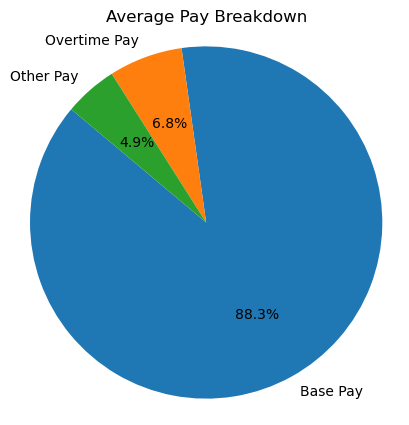

In [76]:
q = ''' select avg(BasePay), avg(OverTimepay), avg( OtherPay) from Salaries
        WHERE BasePay IS NOT NULL 
       and OverTimepay IS NOT NULL 
       and OtherPay IS NOT NULL
       and BasePay NOT IN ('Not Provided', 'Not provided')
       and OverTimepay NOT IN ('Not Provided', 'Not provided')
       and OtherPay NOT IN ('Not Provided', 'Not provided')
  '''
a = pd.read_sql_query(q, conn)
avg_basepay = a['avg(BasePay)'][0]
avg_overtimepay = a['avg(OverTimepay)'][0]
avg_otherpay = a['avg( OtherPay)'][0]

pay_types = ['Base Pay', 'Overtime Pay', 'Other Pay']
averages = [avg_basepay, avg_overtimepay, avg_otherpay]
plt.figure(figsize=(5, 5))
plt.pie(averages, labels=pay_types, autopct='%1.1f%%', startangle=140)
plt.title('Average Pay Breakdown')
plt.axis('equal')  
plt.show()


9. Get the average TotalPayBenefits for each JobTitle, but only for those with an average pay greater than 75000? exclude ('Not Provided', 'Not provided')


In [83]:
q = ''' select avg(TotalPayBenefits) as avgTotalPayBenefits , JobTitle from Salaries
        WHERE jobtitle NOT IN ('Not Provided', 'Not provided') 
        group by jobtitle 
        having avg(TotalPayBenefits)>75000
        '''
sql_query(q)

,avgTotalPayBenefits,JobTitle
0,80266.370000,"ACPO,JuvP, Juv Prob (SFERS)"
1,92698.515000,ADMINISTRATIVE ANALYST III
2,127961.430000,ADMINISTRATIVE ENGINEER
3,77015.580000,ADMINISTRATIVE SERVICES MANAGER
4,257124.440000,"ADMINISTRATOR, SFGH MEDICAL CENTER"
...,...,...
1432,108550.543333,Window Cleaner Supervisor
1433,138837.434333,Wire Rope Cable Maint Mechanic
1434,242118.323333,Wire Rope Cable Maint Sprv
1435,96125.531429,Worker's Comp Supervisor 1


10. Get the number of employees (EmployeeName) for each JobTitle, where the count is greater than 10?  exclude ('Not Provided', 'Not provided')


In [87]:
q = ''' select count(EmployeeName) as totalemployeenumber , JobTitle from Salaries
        WHERE jobtitle NOT IN ('Not Provided', 'Not provided')  and EmployeeName IS NOT NULL
        group by jobtitle 
        having count(EmployeeName)>10
        order by totalemployeenumber desc
        '''
sql_query(q)

,totalemployeenumber,JobTitle
0,7036,Transit Operator
1,4389,Special Nurse
2,3736,Registered Nurse
3,2518,Public Svc Aide-Public Works
4,2421,Police Officer 3
...,...,...
1151,11,AUTOMOTIVE MECHANIC ASSISTANT SUPERVISOR
1152,11,ASSOCIATE PERFORMANCE AUDITOR
1153,11,ASSISTANT ELECTRONIC MAINTENANCE TECHNICIAN
1154,11,ARTS PROGRAM ASSISTANT
